In [131]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets

In [132]:
iris=datasets.load_iris()

In [133]:
X=iris.data[:,:4]

## 手动实现K-means

In [134]:
n,m=X.shape

In [135]:
k=3

In [136]:
center=[]
for i in range(k):
    ind=int(np.random.uniform(0,n))
    center.append(X[i])
center=np.array(center)

In [137]:
center

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [138]:
def dist(x,y):
#     print(x,y)
    return np.sqrt(np.sum((x-y)**2))

In [139]:
changed=True
belong=np.zeros(n)
while changed:
    
    changed=False
    
    #聚类
    for i in range(n):
        mind=1000000
        minj=-1
        for j in range(k):
            if dist(X[i],center[j])<mind:
                mind=dist(X[i],center[j])
                minj=j
        if belong[i]!=minj:
            changed=True
            belong[i]=minj
        
#         print(mind,minj)
    
#     print(belong)
    #更新簇心
    for j in range(k):
        
        center[j]=np.mean(X[np.nonzero(belong==j)],axis=0)
        
    

## 绘图

In [163]:
def draw(X,belong,center,x1,x2):
    
    data0=X[np.nonzero(belong==0)]
    data1=X[np.nonzero(belong==1)]
    data2=X[np.nonzero(belong==2)]
    
    plt.scatter(data0[:,x1],data0[:,x2],c='g',marker='^')
    plt.scatter(data1[:,x1],data1[:,x2],c='b',marker='+')
    plt.scatter(data2[:,x1],data2[:,x2],c='r',marker='*')
#     print(x1,x2)
#     print(type(center))
#     print(center[:,x1])
    plt.scatter(center[:,x1],center[:,x2],c='k')
    

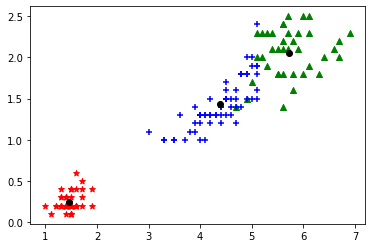

In [164]:
draw(X,belong,center,2,3)

## 调用sklearn库的klearn

In [165]:
model=KMeans(n_clusters=k)

In [166]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [167]:
y=model.labels_

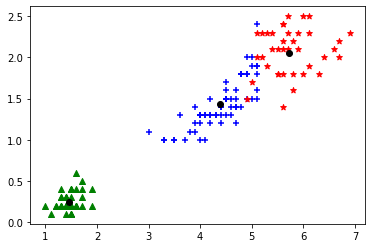

In [169]:
draw(X,y,center,2,3)